In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the car data from csv file

data=pd.read_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\bangalore.csv')
data

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless,Radial",4,352-litres,16,16,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,14,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,14,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0,Diesel,SUV,"1,56,039",Manual,2,2nd Owner,Toyota,Toyota Fortuner,2012,...,Ventilated Disc,Drum,176 Kmph,9.6 Seconds,"Tubeless,Radial",5,296-litres,17,17,190mm
1477,0,Petrol,Sedan,"56,000",Manual,2,2nd Owner,Maruti,Maruti SX4,2008,...,Ventilated Disc,Drum,177 kmph,12.1 seconds,"Tubeless, Radial",4,505 litres,16,16,190mm
1478,0,Petrol,Hatchback,"42,000",Manual,2,2nd Owner,Honda,Honda Brio,2014,...,Disc,Drum,164 Kmph,14.5 Seconds,"Tubeless,Radial",5,175-litres,16,16,190mm
1479,0,Diesel,Hatchback,"93,003",Manual,1,1st Owner,Hyundai,Hyundai i20,2018,...,Disc,Drum,180 Kmph,11.9 Seconds,Tubeless,5,295-litres,16,16,190mm


In [3]:
# dropping columns - Feature selection
bangalore_final_data=data.drop(columns=['it', 'ft', 'transmission', 'owner', 'centralVariantId', 'variantName',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats',
       'Year of Manufacture', 'Features',
       'Torque', 'Seats.1', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'No Door Numbers', 'Cargo Volumn', 'Wheel Size',
       'Alloy Wheel Size', 'Ground Clearance Unladen'],inplace=True)



In [4]:
#selected features for further cleansing
data.columns

Index(['bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear', 'price',
       'Fuel Type', 'Insurance Validity', 'Transmission', 'Mileage', 'Engine',
       'Max Power', 'Color', 'Seating Capacity'],
      dtype='object')

In [5]:
data.isnull().sum()  # check for null records 

bt                    0
km                    0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Fuel Type             0
Insurance Validity    3
Transmission          0
Mileage               0
Engine                0
Max Power             0
Color                 0
Seating Capacity      0
dtype: int64

In [6]:
# Check for datatypes
data.dtypes

bt                    object
km                    object
ownerNo                int64
oem                   object
model                 object
modelYear              int64
price                 object
Fuel Type             object
Insurance Validity    object
Transmission          object
Mileage               object
Engine                object
Max Power             object
Color                 object
Seating Capacity       int64
dtype: object

In [7]:
# column name renaming as part of standaradization
dict={'bt':'Car_type',
      'km':'Kms_driven',
      'ownerNo':'No_of_owners',
      'model':'Car_model',
      'oem':'Car_name',
      'modelYear':'Model_Year',
      'price':'Car_price',
      'Fuel Type':'Fuel_type',
      'Insurance Validity':'Insurance_type',
      'Seating Capacity':'Seating_capacity',
      'Max Power':'Max_power'
      }
data.rename(columns =dict , inplace = True)


data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,Hatchback,"1,20,000",3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Petrol,Third Party insurance,Manual,23.1 kmpl,998 CC,67.04bhp@6000rpm,White,5
1,SUV,"32,706",2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Petrol,Comprehensive,Manual,17 kmpl,1497 CC,121.31bhp@6500rpm,White,5
2,Hatchback,"11,949",1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Petrol,Comprehensive,Manual,23.84 kmpl,1199 CC,84bhp@6000rpm,Red,5
3,Sedan,"17,794",1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Petrol,Comprehensive,Manual,19.1 kmpl,1197 CC,81.86bhp@6000rpm,Others,5
4,SUV,"60,000",1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Diesel,Third Party insurance,Manual,23.65 kmpl,1248 CC,88.5bhp@4000rpm,Gray,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,SUV,"1,56,039",2,Toyota,Toyota Fortuner,2012,₹ 16.49 Lakh,Diesel,Comprehensive,Manual,12.55 kmpl,2982 CC,168.5bhp@3600rpm,Blue,7
1477,Sedan,"56,000",2,Maruti,Maruti SX4,2008,₹ 3.30 Lakh,Petrol,Comprehensive,Manual,15 kmpl,1586 CC,"104.68@5,600 (PS@rpm)",Red,5
1478,Hatchback,"42,000",2,Honda,Honda Brio,2014,₹ 4.25 Lakh,Petrol,NaN,Manual,19.4 kmpl,1198 CC,86.8bhp@6000rpm,White,5
1479,Hatchback,"93,003",1,Hyundai,Hyundai i20,2018,₹ 7.50 Lakh,Diesel,NaN,Manual,22.54 kmpl,1396 CC,88.73bhp@4000rpm,Red,5


In [8]:
# Function to convert lakh to numerical format in price column 
def convert_lakh_to_numeric(value):
    if 'lakh' in value:
        num = float(value.replace(' lakh', '').strip().replace(',', ''))
        return int(num * 100000)
    elif 'crore' in value:
        num = float(value.replace(' crore', '').strip().replace(',', ''))
        return int(num * 10000000)
    return value


In [9]:
# Column data type conversion with regex replace to get numerical data
 
data['Car_price'] = data['Car_price'].str.lower().replace(r'[^\d.a-zA-Z ]','',regex=True).apply(convert_lakh_to_numeric).astype(int)
data['Mileage']=data['Mileage'].str.lower().replace(r'[^\d.]','',regex=True).astype(float)
data['Max_power']=data['Max_power'].str.lower().replace(r'@.*| .*|[a-zA-Z]','',regex=True).astype(float)
data['Engine']=data['Engine'].str.replace(r'[^\d]','',regex=True).astype(int)
data['Kms_driven']=data['Kms_driven'].str.replace(r'[^\d]','',regex=True).astype(int)
data


,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,Hatchback,120000,3,Maruti,Maruti Celerio,2015,400000,Petrol,Third Party insurance,Manual,23.10,998,67.04,White,5
1,SUV,32706,2,Ford,Ford Ecosport,2018,811000,Petrol,Comprehensive,Manual,17.00,1497,121.31,White,5
2,Hatchback,11949,1,Tata,Tata Tiago,2018,585000,Petrol,Comprehensive,Manual,23.84,1199,84.00,Red,5
3,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,462000,Petrol,Comprehensive,Manual,19.10,1197,81.86,Others,5
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,790000,Diesel,Third Party insurance,Manual,23.65,1248,88.50,Gray,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,SUV,156039,2,Toyota,Toyota Fortuner,2012,1648999,Diesel,Comprehensive,Manual,12.55,2982,168.50,Blue,7
1477,Sedan,56000,2,Maruti,Maruti SX4,2008,330000,Petrol,Comprehensive,Manual,15.00,1586,104.68,Red,5
1478,Hatchback,42000,2,Honda,Honda Brio,2014,425000,Petrol,NaN,Manual,19.40,1198,86.80,White,5
1479,Hatchback,93003,1,Hyundai,Hyundai i20,2018,750000,Diesel,NaN,Manual,22.54,1396,88.73,Red,5


In [10]:
data.dtypes  # Required data type post conversion  

Car_type             object
Kms_driven            int64
No_of_owners          int64
Car_name             object
Car_model            object
Model_Year            int64
Car_price             int64
Fuel_type            object
Insurance_type       object
Transmission         object
Mileage             float64
Engine                int64
Max_power           float64
Color                object
Seating_capacity      int64
dtype: object

In [12]:
# City wise data stored to csv file
data.to_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\final_cleaned_csv_files\edited_bdata.csv',encoding='utf-8',index=False)

In [13]:
data.shape

(1481, 15)

In [14]:
print(data['No_of_owners'].unique())

[3 2 1 4 5]


In [15]:
print(data['Transmission'].unique())

['Manual' 'Automatic']


In [16]:
print(data['Model_Year'].unique())

[2015 2018 2014 2020 2017 2021 2019 2022 2016 2011 2009 2013 2010 2008
 2006 2012 2005 2007 2023 1995 1998 2004 2003 2001 2002 2000]


In [17]:
print(data['Fuel_type'].unique())

['Petrol' 'Diesel' 'LPG' 'CNG' 'Electric']


In [18]:
print(data['Car_type'].unique())

['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Pickup Trucks'
 'Convertibles']


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_type          1481 non-null   object 
 1   Kms_driven        1481 non-null   int64  
 2   No_of_owners      1481 non-null   int64  
 3   Car_name          1481 non-null   object 
 4   Car_model         1481 non-null   object 
 5   Model_Year        1481 non-null   int64  
 6   Car_price         1481 non-null   int64  
 7   Fuel_type         1481 non-null   object 
 8   Insurance_type    1478 non-null   object 
 9   Transmission      1481 non-null   object 
 10  Mileage           1481 non-null   float64
 11  Engine            1481 non-null   int64  
 12  Max_power         1481 non-null   float64
 13  Color             1481 non-null   object 
 14  Seating_capacity  1481 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 173.7+ KB


In [20]:
data.describe

<bound method NDFrame.describe of        Car_type  Kms_driven  No_of_owners Car_name           Car_model  \
0     Hatchback      120000             3   Maruti      Maruti Celerio   
1           SUV       32706             2     Ford       Ford Ecosport   
2     Hatchback       11949             1     Tata          Tata Tiago   
3         Sedan       17794             1  Hyundai       Hyundai Xcent   
4           SUV       60000             1   Maruti  Maruti SX4 S Cross   
...         ...         ...           ...      ...                 ...   
1476        SUV      156039             2   Toyota     Toyota Fortuner   
1477      Sedan       56000             2   Maruti          Maruti SX4   
1478  Hatchback       42000             2    Honda          Honda Brio   
1479  Hatchback       93003             1  Hyundai         Hyundai i20   
1480  Hatchback       36000             2  Hyundai   Hyundai Grand i10   

      Model_Year  Car_price Fuel_type         Insurance_type Transmission  \


In [21]:
data.describe()

,Kms_driven,No_of_owners,Model_Year,Car_price,Mileage,Engine,Max_power,Seating_capacity
count,1481.000000,1481.000000,1481.000000,1.481000e+03,1481.000000,1481.000000,1481.000000,1481.000000
mean,57390.370020,1.511141,2016.118163,9.543598e+05,19.102194,1446.483457,675.970429,5.205267
std,33173.906176,0.737997,4.060216,9.701249e+05,5.726634,486.501586,21922.110455,0.668600
min,150.000000,1.000000,1995.000000,4.000000e+04,7.810000,0.000000,25.400000,4.000000
25%,30000.000000,1.000000,2014.000000,4.760000e+05,17.000000,1197.000000,81.800000,5.000000
50%,52486.000000,1.000000,2017.000000,6.720000e+05,18.900000,1248.000000,88.700000,5.000000
75%,80000.000000,2.000000,2019.000000,1.010000e+06,21.400000,1582.000000,120.690000,5.000000
max,199000.000000,5.000000,2023.000000,1.300000e+07,140.000000,5000.000000,843750.000000,10.000000


In [22]:
# Descriptive statistical summary of categorical features
data.describe(include= 'object')

,Car_type,Car_name,Car_model,Fuel_type,Insurance_type,Transmission,Color
count,1481,1481,1481,1481,1478,1481,1481
unique,8,29,199,5,7,2,34
top,Hatchback,Maruti,Maruti Swift,Petrol,Third Party insurance,Manual,Others
freq,673,373,95,1003,719,1013,410


In [23]:
# calculating vehicle age as feature
from datetime import datetime

current_year = datetime.now().year

# Calculate age
data['Vehicle_age']= current_year - data['Model_Year']
data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity,Vehicle_age
0,Hatchback,120000,3,Maruti,Maruti Celerio,2015,400000,Petrol,Third Party insurance,Manual,23.10,998,67.04,White,5,9
1,SUV,32706,2,Ford,Ford Ecosport,2018,811000,Petrol,Comprehensive,Manual,17.00,1497,121.31,White,5,6
2,Hatchback,11949,1,Tata,Tata Tiago,2018,585000,Petrol,Comprehensive,Manual,23.84,1199,84.00,Red,5,6
3,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,462000,Petrol,Comprehensive,Manual,19.10,1197,81.86,Others,5,10
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,790000,Diesel,Third Party insurance,Manual,23.65,1248,88.50,Gray,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,SUV,156039,2,Toyota,Toyota Fortuner,2012,1648999,Diesel,Comprehensive,Manual,12.55,2982,168.50,Blue,7,12
1477,Sedan,56000,2,Maruti,Maruti SX4,2008,330000,Petrol,Comprehensive,Manual,15.00,1586,104.68,Red,5,16
1478,Hatchback,42000,2,Honda,Honda Brio,2014,425000,Petrol,NaN,Manual,19.40,1198,86.80,White,5,10
1479,Hatchback,93003,1,Hyundai,Hyundai i20,2018,750000,Diesel,NaN,Manual,22.54,1396,88.73,Red,5,6


In [24]:
# Feature Engineering steps

data_next=data.copy()

# dropping unnecessary features for further analysis

data_next.drop(columns= ['Car_name','Model_Year','Car_model','Color'],axis= 1, inplace= True) 
data_next

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,120000,3,400000,Petrol,Third Party insurance,Manual,23.10,998,67.04,5,9
1,SUV,32706,2,811000,Petrol,Comprehensive,Manual,17.00,1497,121.31,5,6
2,Hatchback,11949,1,585000,Petrol,Comprehensive,Manual,23.84,1199,84.00,5,6
3,Sedan,17794,1,462000,Petrol,Comprehensive,Manual,19.10,1197,81.86,5,10
4,SUV,60000,1,790000,Diesel,Third Party insurance,Manual,23.65,1248,88.50,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,SUV,156039,2,1648999,Diesel,Comprehensive,Manual,12.55,2982,168.50,7,12
1477,Sedan,56000,2,330000,Petrol,Comprehensive,Manual,15.00,1586,104.68,5,16
1478,Hatchback,42000,2,425000,Petrol,NaN,Manual,19.40,1198,86.80,5,10
1479,Hatchback,93003,1,750000,Diesel,NaN,Manual,22.54,1396,88.73,5,6


In [25]:
print("'Vehicle age' variable have {} unique category : {}".format(data_next['Vehicle_age'].nunique(), 
                                                                   data_next['Vehicle_age'].unique()))

'Vehicle age' variable have 26 unique category : [ 9  6 10  4  7  3  5  2  8 13 15 11 14 16 18 12 19 17  1 29 26 20 21 23
 22 24]


In [26]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,120000,3,400000,Petrol,Third Party insurance,Manual,23.10,998,67.04,5,9
1,SUV,32706,2,811000,Petrol,Comprehensive,Manual,17.00,1497,121.31,5,6
2,Hatchback,11949,1,585000,Petrol,Comprehensive,Manual,23.84,1199,84.00,5,6
3,Sedan,17794,1,462000,Petrol,Comprehensive,Manual,19.10,1197,81.86,5,10
4,SUV,60000,1,790000,Diesel,Third Party insurance,Manual,23.65,1248,88.50,5,9


Data Visualization 

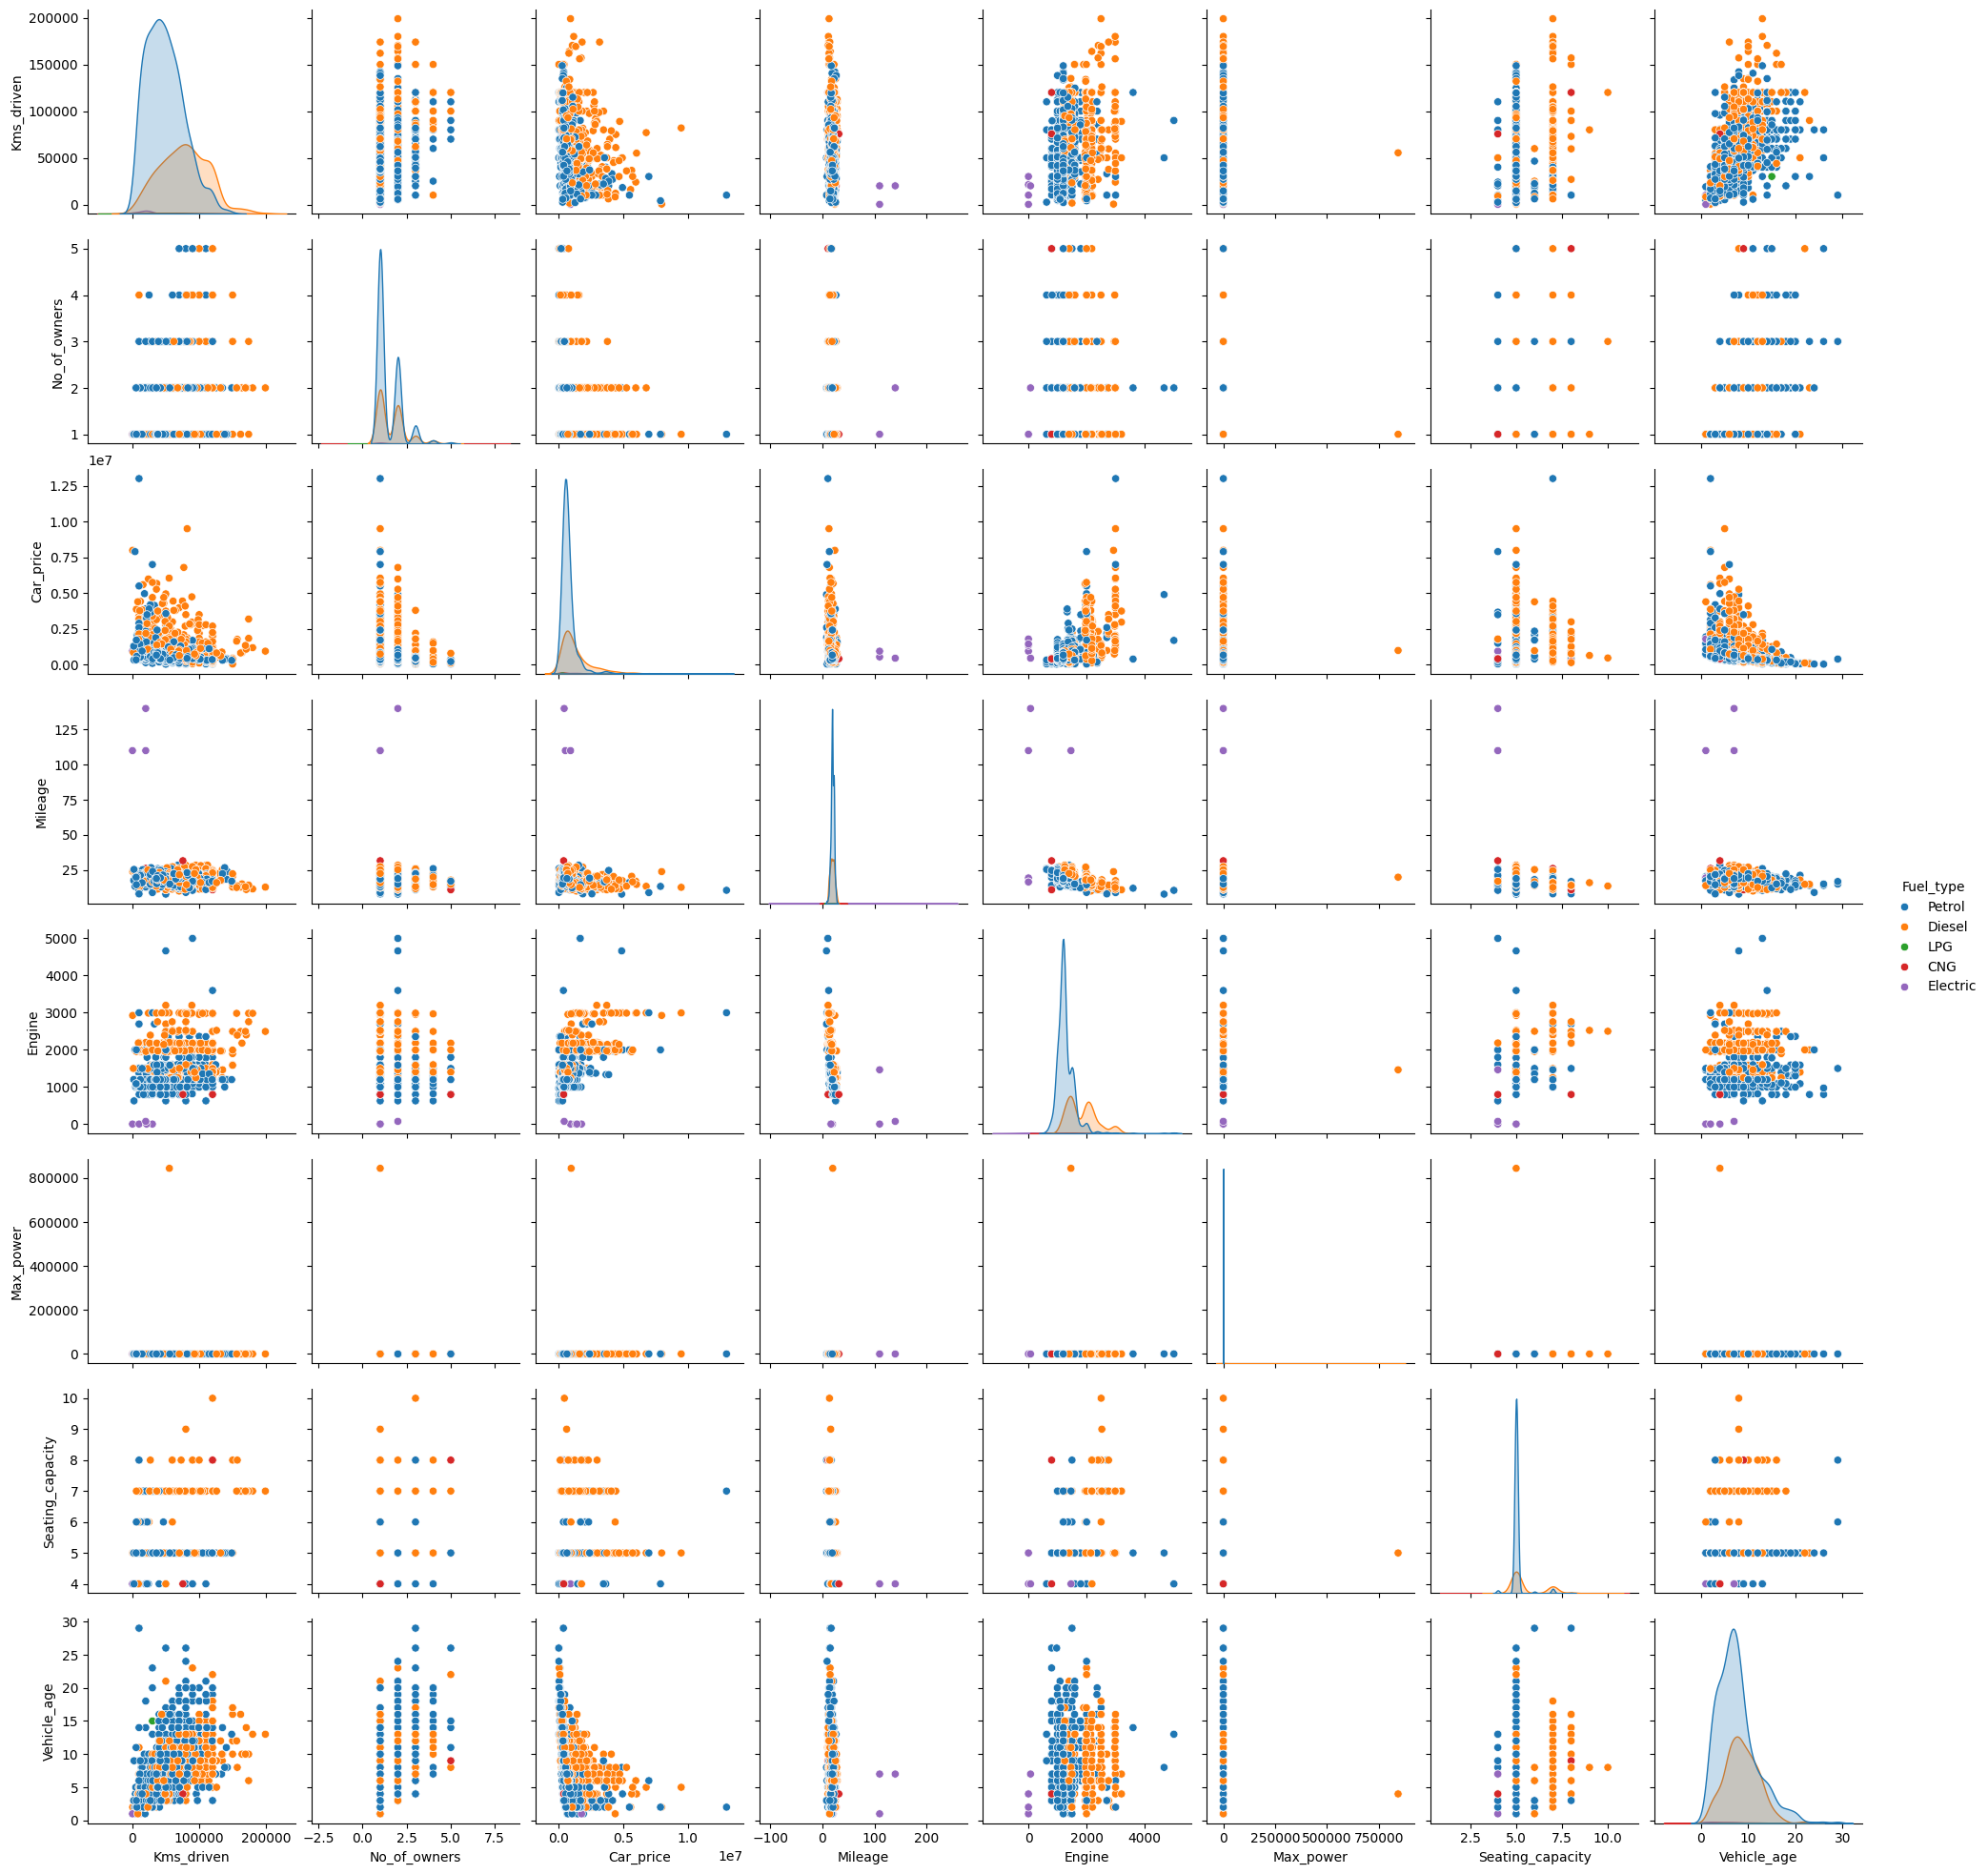

In [27]:
# Numerical data columns analyis 
sns.pairplot(data=data_next, hue= 'Fuel_type', diag_kind= 'kde')

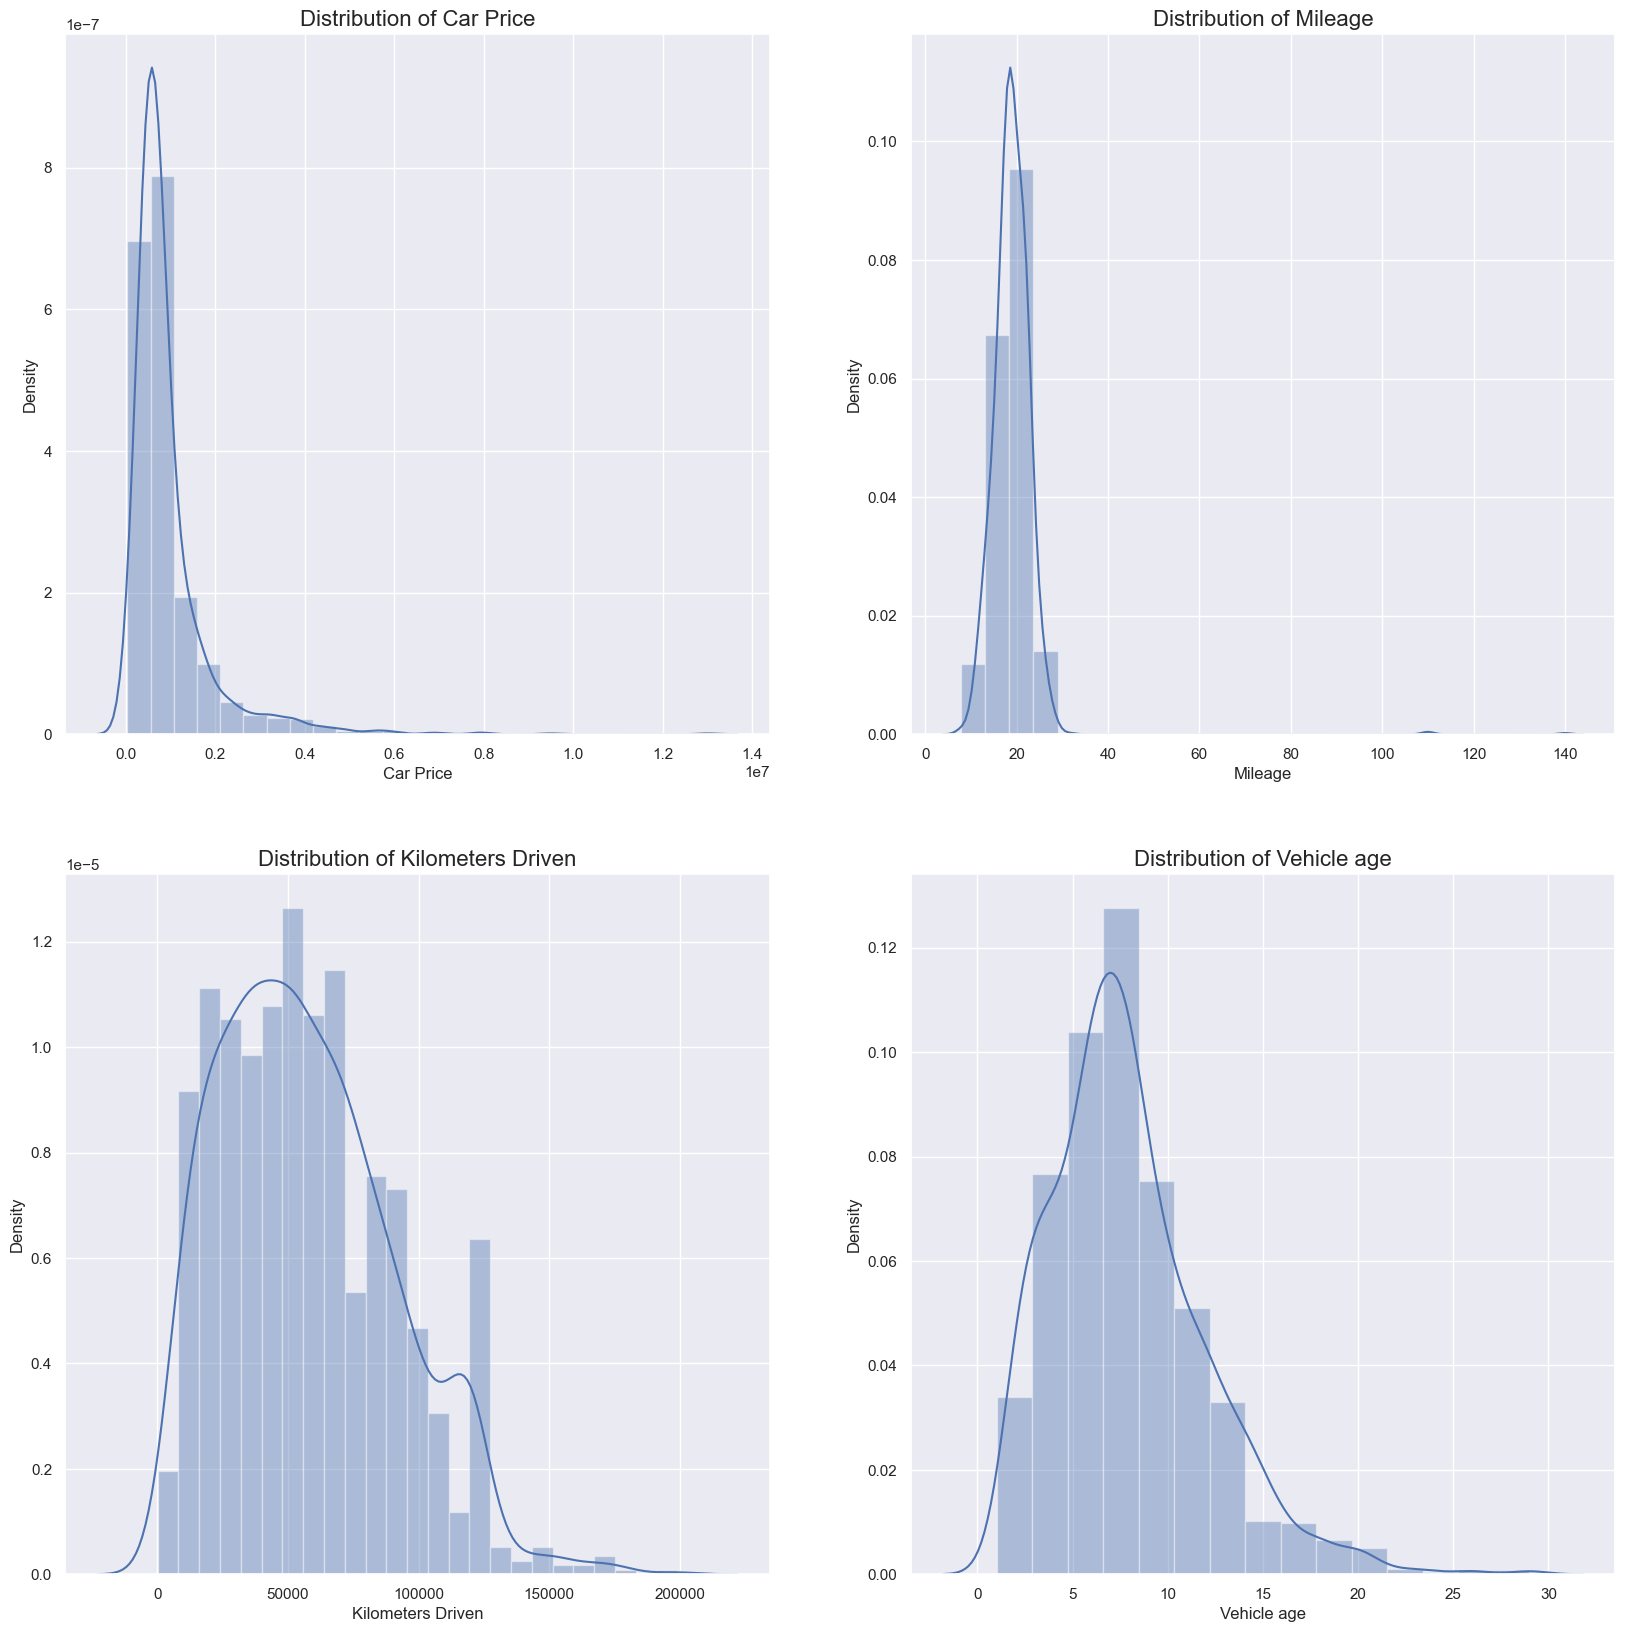

In [34]:
# Let's see the distribution of the variables from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, fourth plot)



# Subplot 1: Distplot of 'Car_Price' feature
k1 = sns.distplot(a = data_next['Car_price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Car Price', fontsize=16)
ax0.set(xlabel= 'Car Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Mileage' feature
k2 = sns.distplot(a = data_next['Mileage'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Mileage', fontsize=16)
ax1.set(xlabel= 'Mileage', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = data_next['Kms_driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = data_next['Vehicle_age'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Vehicle age', fontsize=16)
ax3.set(xlabel= 'Vehicle age', ylabel= 'Density')


plt.show()
#fig.savefig("Distributionplot.png")


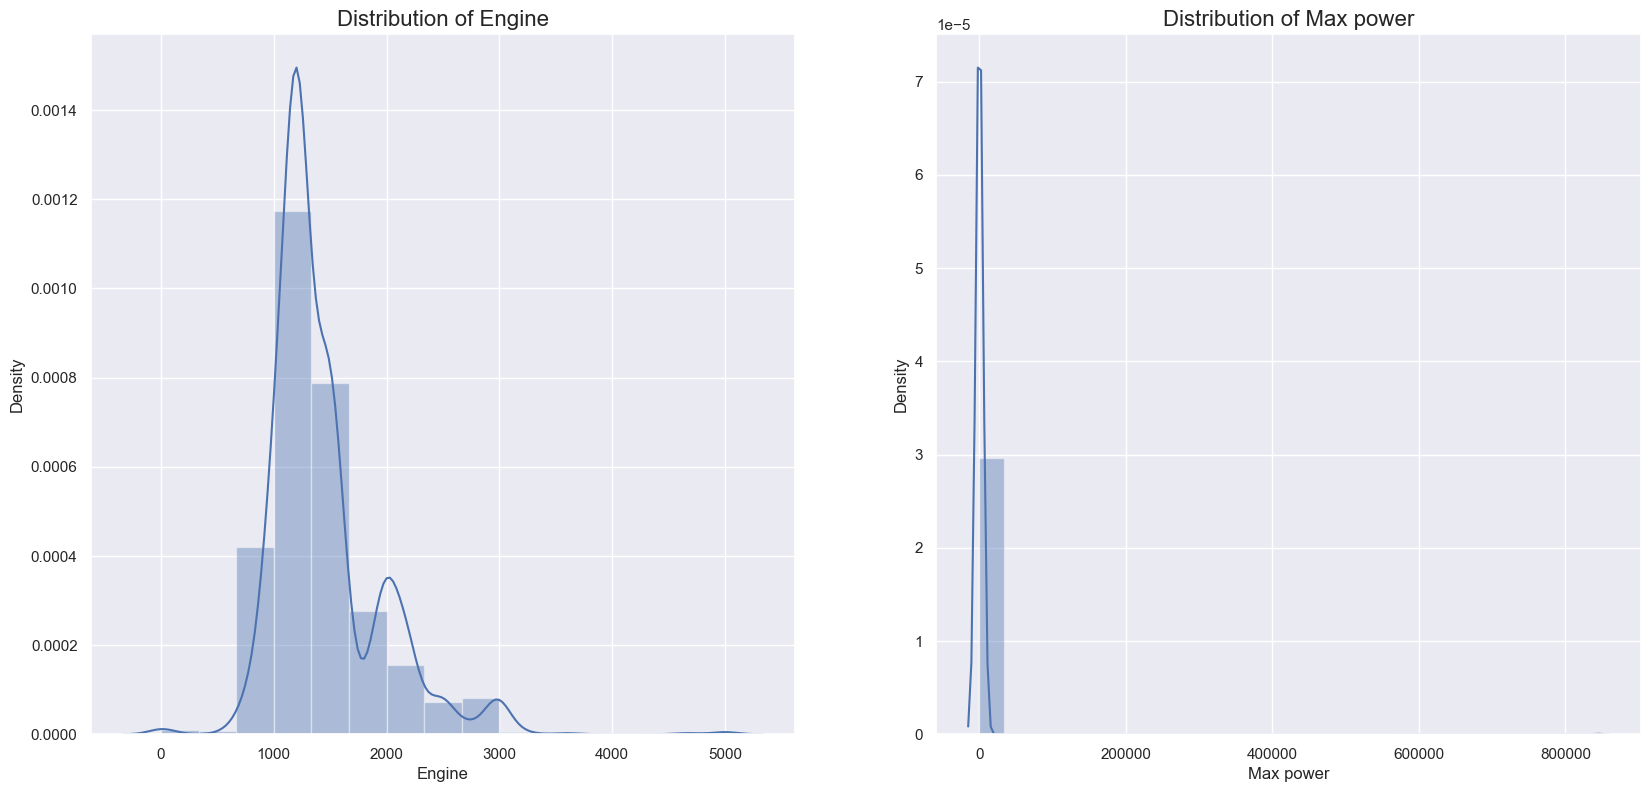

In [40]:
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)

# Subplot 5: Distplot of 'Engine' feature
k1 = sns.distplot(a = data_next['Engine'], bins= 15, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Engine', fontsize=16)
ax0.set(xlabel= 'Engine', ylabel= 'Density')

# Subplot 6: Distplot of 'Max power' feature
k2 = sns.distplot(a = data_next['Max_power'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Max power', fontsize=16)
ax1.set(xlabel= 'Max power', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")


In [64]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Selling_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,120000,3,400000,Petrol,Third Party insurance,Manual,23.10,998,67.04,5,9
1,SUV,32706,2,811000,Petrol,Comprehensive,Manual,17.00,1497,121.31,5,6
2,Hatchback,11949,1,585000,Petrol,Comprehensive,Manual,23.84,1199,84.00,5,6
3,Sedan,17794,1,462000,Petrol,Comprehensive,Manual,19.10,1197,81.86,5,10
4,SUV,60000,1,790000,Diesel,Third Party insurance,Manual,23.65,1248,88.50,5,9


In [66]:
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)
cat_col

['Fuel_type', 'Insurance_type', 'Transmission', 'Car_type']

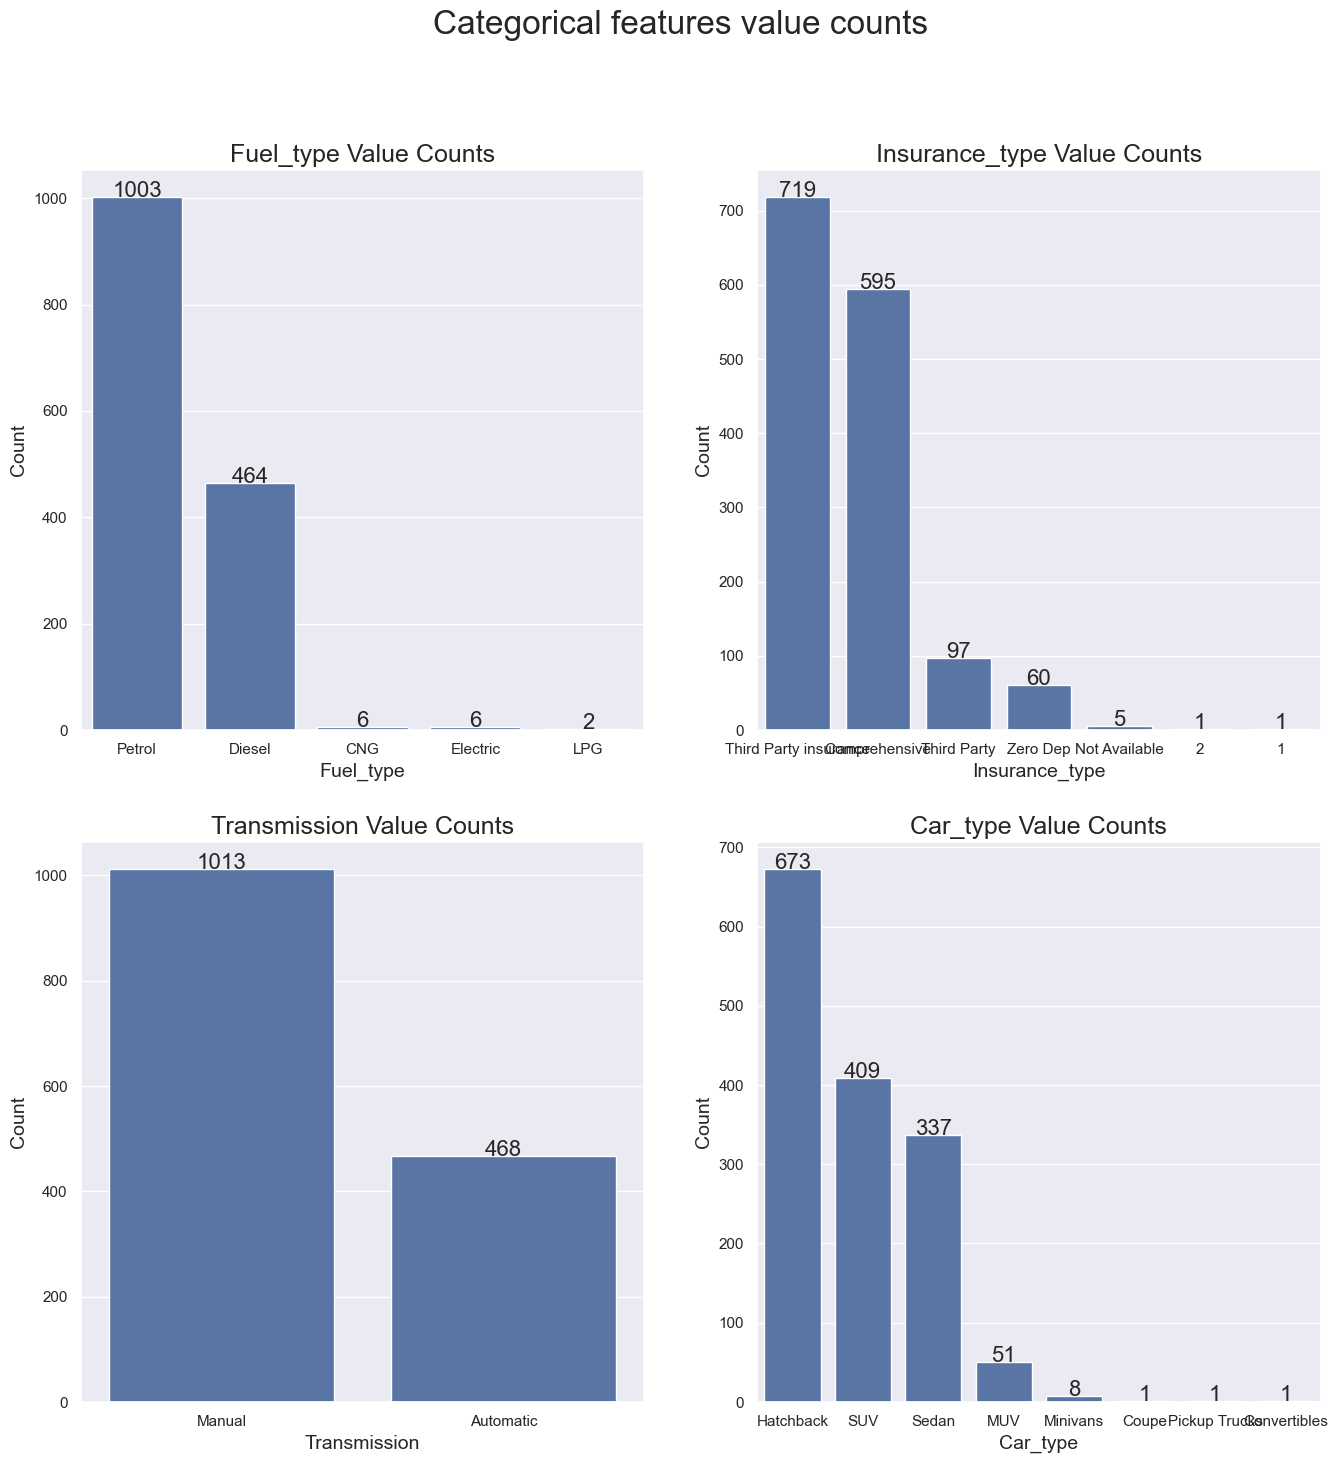

In [67]:
# Categorical data analysis
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = data_next[cat_col[k]].value_counts()
    sns.countplot(data = data_next, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1